### Machine Learning Tutorial Python - 8: Logistic Regression (Binary Classification)

#### Predicting if a person would buy life insurnace based on his age using logistic regression
Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


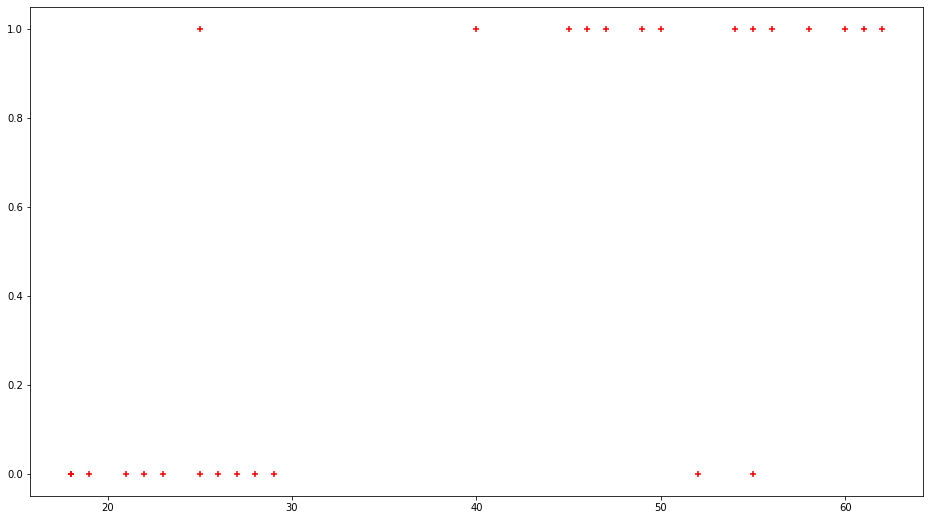

In [3]:
plt.figure(figsize=(16, 9))
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [6]:
X_test

,age
13,29
20,21
15,55
11,28
5,56
25,54


In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [8]:
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
X_test

,age
13,29
20,21
15,55
11,28
5,56
25,54


In [10]:
y_predicted = model.predict(X_test)

In [11]:
model.predict_proba(X_test)

array([[0.73790325, 0.26209675],
       [0.87422622, 0.12577378],
       [0.12987034, 0.87012966],
       [0.75915793, 0.24084207],
       [0.11762919, 0.88237081],
       [0.14317865, 0.85682135]])

In [12]:
model.score(X_test,y_test)

1.0

In [13]:
y_predicted

array([0, 0, 1, 0, 1, 1])

In [14]:
X_test

,age
13,29
20,21
15,55
11,28
5,56
25,54


#### model.coef_ indicates value of m in y=m*x + b equation

In [15]:
model.coef_

array([[0.11296941]])

#### model.intercept_ indicates value of b in y=m*x + b equation

In [16]:
model.intercept_

array([-4.31121195])

#### Lets defined sigmoid function now and do the math with hand

In [17]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [18]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [19]:
age = 35
prediction_function(age)

0.4850044983805899

#### 0.485 is less than 0.5 which means person with 35 age will not buy insurance

In [20]:
age = 43
prediction_function(age)

0.568565299077705

#### 0.568 is more than 0.5 which means person with 43 will buy the insurance

### Exercise

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<h2 style="color:purple">Data exploration and visualization</h2>

In [23]:
left = df[df.left==1]
left.shape

(3571, 10)

In [24]:
retained = df[df.left==0]
retained.shape

(11428, 10)

#### Average numbers for all columns

In [25]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

1. **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
2. **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
3. **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

#### Impact of salary on employee retention

<AxesSubplot:xlabel='salary'>

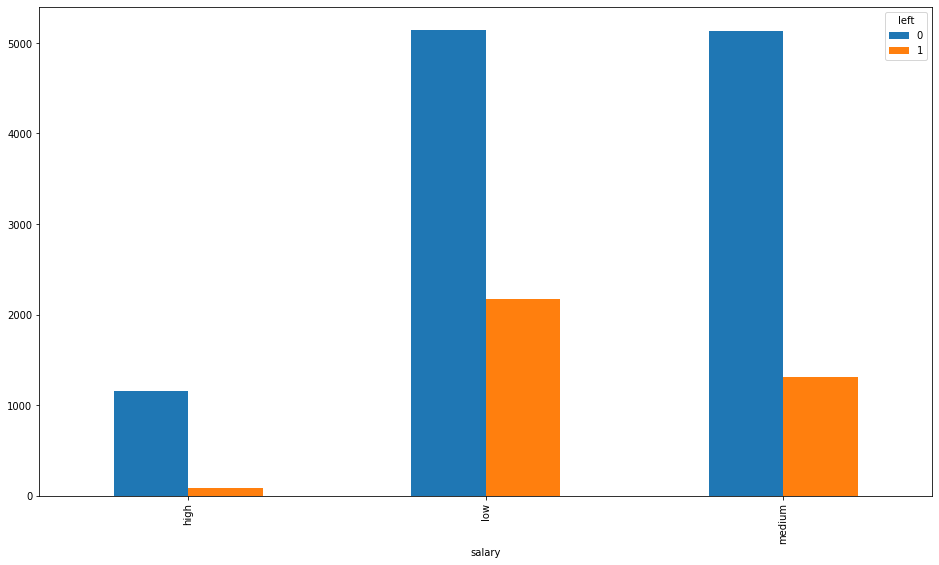

In [26]:
pd.crosstab(df.salary,df.left).plot(kind='bar', figsize=(16, 9))

Above bar chart shows employees with high salaries are likely to not leave the company

#### Department wise employee retention rate

<AxesSubplot:xlabel='Department'>

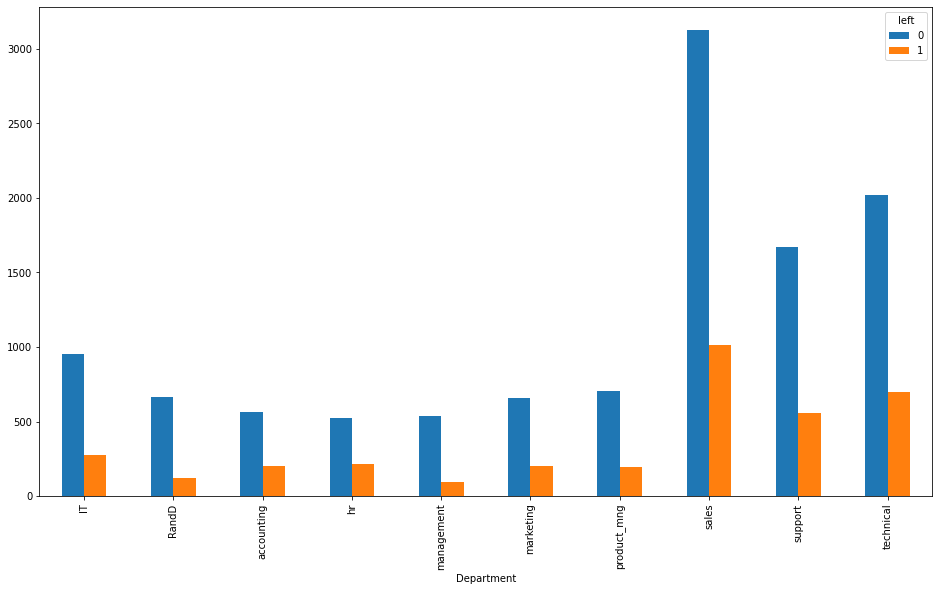

In [27]:
pd.crosstab(df.Department,df.left).plot(kind='bar', figsize=(16, 9))

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

<h2 style="color:purple">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h2>

1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
5. **Salary**

In [28]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


#### Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [29]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [30]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [31]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [32]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [33]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [34]:
y = df.left

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [37]:
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

#### Accuracy of the model

In [39]:
model.score(X_test,y_test)

0.7760952380952381